In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
pd.set_option('display.max_columns',None)

In [3]:
dfs = []
for file in os.listdir('/NFS_SQUAD_HISTO/OCI_DATA/01_raw/cdr/'):
    try : 
        dfs+=[pd.read_csv('/NFS_SQUAD_HISTO/OCI_DATA/01_raw/cdr/'+file)]
    except pd.errors.EmptyDataError:
        continue
cdr = pd.concat(dfs).reset_index(drop=True)

In [60]:
cdr['date'] = pd.to_datetime(cdr.eventdate,format='%Y%m%d')
cdr

,eventdate,name2,connection_type,duration_sec,data_usage,date
0,20210711,2252721767645,4G,1800,533768649,2021-07-11
1,20210711,2250767358105,4G,720,65496728,2021-07-11
2,20210711,2250707168594,4G,720,242318636,2021-07-11
3,20210711,2250707305058,4G,720,833079,2021-07-11
4,20210711,2250707350208,4G,720,10308385,2021-07-11
...,...,...,...,...,...,...
75618481,20210630,2250759131351,NaN,360,780,2021-06-30
75618482,20210630,2250797047504,NaN,360,10869,2021-06-30
75618483,20210630,2250797055354,NaN,360,91,2021-06-30
75618484,20210630,2250708210215,2G,360,1010,2021-06-30


In [7]:
for name in cdr.name2:
    if '130817' in str(name):
        print(str(name).replace('130817',''))

2250788
2250788
2250759
2250759
2250759
2250759
2250769
2250788
2250788
2250788
2250777
2250788
2250777
2250759
2250707
2250759
2250788
2250777
2250777
2250749
2250788
2250777
2250769
2250777
2250788
2250749
2250777
2250779
2250707
2250788
2250788
2250779
2250777
2250777
2250749
2250749
2250769
2250759
2250759
2250779
2250777
2250749
2250788
2250788
2250769
2250777
2250777
2250788
2250759
2250759
2250788


<AxesSubplot:xlabel='duration_sec'>

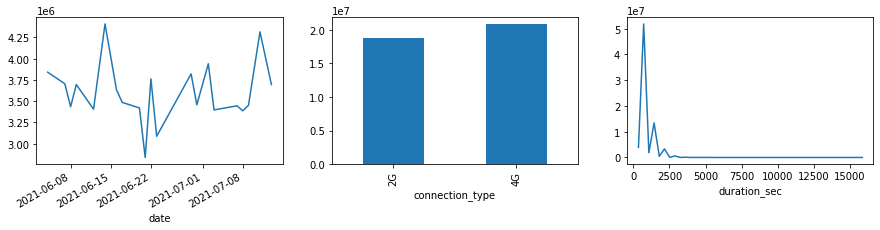

In [71]:
fig, axs = plt.subplots(1,3,figsize=(15,3))
cdr.groupby(['date']).size().plot(ax = axs[0])
cdr.groupby(['connection_type']).size().plot(ax = axs[1],kind='bar')
cdr.groupby(['duration_sec']).size().plot(ax = axs[2])

In [63]:
cdr.describe()

,eventdate,name2,duration_sec,data_usage
count,7.561849e+07,7.561849e+07,7.561849e+07,7.561849e+07
mean,2.021065e+07,2.250786e+12,9.321953e+02,1.064064e+08
std,4.372425e+01,1.201342e+09,4.617747e+02,7.753987e+08
min,2.021060e+07,2.257769e+10,3.600000e+02,2.800000e+01
25%,2.021061e+07,2.250710e+12,7.200000e+02,6.509000e+04
50%,2.021062e+07,2.250759e+12,7.200000e+02,1.714354e+06
75%,2.021070e+07,2.250779e+12,1.080000e+03,3.632537e+07
max,2.021071e+07,2.252737e+12,1.584000e+04,2.666985e+11
